In [1]:
load(file = "gtf_df.Rda")
require(dplyr)
require(tidyr)
library(DESeq2)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: tidyr

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    d

In [2]:
ref<-read.csv("M8COUNT-tcgaref.csv",header=T)
ref

mRNA_ID,TCGA.W5.AA2I.01A,TCGA.W5.AA2I.11A,TCGA.W5.AA2Q.01A,TCGA.W5.AA2Q.11A,TCGA.W5.AA2R.01A,TCGA.W5.AA2R.11A,TCGA.W5.AA2U.01A,TCGA.W5.AA2U.11A,TCGA.W5.AA30.01A,TCGA.W5.AA30.11A,TCGA.W5.AA31.01A,TCGA.W5.AA31.11A,TCGA.W5.AA34.01A,TCGA.W5.AA34.11A,TCGA.ZU.A8S4.01A,TCGA.ZU.A8S4.11A
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000000003.13,4245,4689,4658,1921,4802,3534,7450,2476,5132,3085,13705,4405,8150,4832,1905,4107
ENSG00000000005.5,0,0,0,3,1,2,1,1,0,1,0,6,0,0,0,0
ENSG00000000419.11,788,651,1309,466,1198,719,1195,655,1644,636,2140,860,1770,981,1582,741
ENSG00000000457.12,714,361,4798,335,1099,344,1183,346,2652,374,2230,557,1202,556,474,312
ENSG00000000460.15,307,41,943,76,290,74,274,34,1044,98,662,123,378,70,437,170
ENSG00000000938.11,118,75,83,326,855,165,304,311,378,233,512,201,223,121,628,300
ENSG00000000971.14,1388,50514,1370,29746,6205,61751,4093,35982,3352,48063,16167,67991,11905,55512,11683,79710
ENSG00000001036.12,3416,2069,2534,1157,3710,1545,2500,1589,2998,1822,4676,2530,3154,2152,5925,1688
ENSG00000001084.9,1715,3701,1225,2230,2379,11904,3160,4711,3248,2724,2306,7688,1853,9232,2819,3732


In [3]:
bind3<-read.table('ICC_Ca_N.htseq.count')

In [4]:
bind3

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
gene_id,Ca1,N1,Ca2534465,N2534465,Ca2537821,N2537821,Ca3,N3,N6,⋯,N2393116,N2518780,N2520263,N2523247,N2287602,Ca2393116,Ca2518780,Ca2520263,Ca2523247,Ca2287602
ENSG00000000003.13,872,2969,161,496,320,1354,2237,3186,3626,⋯,1505,1770,494,1117,1317,1297,381,406,713,561
ENSG00000000005.5,2,15,6,8,2,2,2,18,13,⋯,7,3,13,6,16,32,1,14,3,7
ENSG00000000419.11,487,358,219,235,335,420,462,424,507,⋯,350,308,190,323,351,424,634,287,825,288
ENSG00000000457.12,705,543,127,300,683,505,820,521,763,⋯,603,512,522,549,494,1716,280,448,614,366
ENSG00000000460.15,395,172,98,94,412,209,243,160,336,⋯,178,132,137,164,150,421,164,236,491,127
ENSG00000000938.11,1867,275,190,168,345,331,568,339,1026,⋯,254,185,200,380,172,141,1050,257,163,1351
ENSG00000000971.14,12756,80375,1778,22375,13020,53948,26721,74767,102615,⋯,54137,34452,21623,41727,44191,11846,12064,4634,3264,12247
ENSG00000001036.12,2300,1500,312,156,1311,693,1974,1427,2174,⋯,717,716,244,781,624,1023,1448,663,1224,1018


In [5]:
colnames(bind3)<-bind3[1,]
bind3<-bind3[-1,]

In [6]:
bind2<-cbind(bind3,ref[,2:17])

In [7]:
dim(bind2)

[1] 60483    45

In [8]:
expr_df_nopoint <- bind2 %>% 
 tidyr::separate(gene_id,into = c("gene_id","drop"),sep="\\.") %>% 
   dplyr::select(-drop)

expr_df<- gtf_df %>% 
  dplyr::filter(type=="gene",gene_biotype=="protein_coding") %>% #筛选gene,和编码指标
  dplyr::select(c(gene_name,gene_id,gene_biotype)) %>% 
  dplyr::inner_join(expr_df_nopoint ,by ="gene_id") %>% 
  dplyr::select(-c(gene_id,gene_biotype))

In [9]:
expr_df

gene_name,Ca1,N1,Ca2534465,N2534465,Ca2537821,N2537821,Ca3,N3,N6,⋯,TCGA.W5.AA2U.01A,TCGA.W5.AA2U.11A,TCGA.W5.AA30.01A,TCGA.W5.AA30.11A,TCGA.W5.AA31.01A,TCGA.W5.AA31.11A,TCGA.W5.AA34.01A,TCGA.W5.AA34.11A,TCGA.ZU.A8S4.01A,TCGA.ZU.A8S4.11A
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
OR4F5,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
SAMD11,212,349,28,33,93,285,113,168,194,⋯,38,64,157,268,2516,68,54,148,209,58
NOC2L,1889,946,216,249,667,723,1026,696,1083,⋯,3042,1569,2873,1456,7219,1767,2695,1851,4235,1446
KLHL17,329,98,49,36,125,69,205,93,74,⋯,393,79,853,126,699,98,540,98,436,58
PLEKHN1,181,17,17,8,86,15,205,11,37,⋯,316,9,132,8,718,0,254,3,271,6
PERM1,107,9,71,0,16,8,61,6,6,⋯,99,3,74,12,248,6,202,4,122,4
HES4,1013,61,334,63,281,75,781,69,45,⋯,932,54,542,74,1338,47,789,35,445,38
ISG15,775,600,207,74,261,279,691,488,2906,⋯,1693,739,1623,833,5650,850,886,1047,1875,722
AGRN,72182,3664,987,842,9159,2265,19659,2773,2876,⋯,17860,1716,12937,3188,135288,3628,27900,3599,15433,1764


In [11]:
for (i in 2:45){
expr_df[,i]<-as.numeric(as.character(expr_df[,i]))}
summary(expr_df)

  gene_name              Ca1                N1            Ca2534465       
 Length:19668       Min.   :      0   Min.   :      0   Min.   :     0.0  
 Class :character   1st Qu.:     27   1st Qu.:      9   1st Qu.:     8.0  
 Mode  :character   Median :    418   Median :    215   Median :   112.0  
                    Mean   :   1600   Mean   :   1493   Mean   :   538.8  
                    3rd Qu.:   1478   3rd Qu.:    836   3rd Qu.:   443.0  
                    Max.   :1116621   Max.   :3822573   Max.   :259114.0  
    N2534465          Ca2537821           N2537821            Ca3        
 Min.   :     0.0   Min.   :     0.0   Min.   :      0   Min.   :     0  
 1st Qu.:     5.0   1st Qu.:    16.0   1st Qu.:     12   1st Qu.:    20  
 Median :    79.0   Median :   240.0   Median :    197   Median :   394  
 Mean   :   466.0   Mean   :   928.4   Mean   :   1162   Mean   :  1459  
 3rd Qu.:   328.2   3rd Qu.:   811.2   3rd Qu.:    738   3rd Qu.:  1341  
 Max.   :528998.0   Max.   :777

In [12]:
expr_df<-expr_df %>% group_by(gene_name) %>% summarise_each(funs(sum)) 
expr_df<-as.data.frame(expr_df)
rownames(expr_df)<-expr_df[,1]
expr_df<-expr_df[,-1]


In [13]:
type1<-rep(c("cancer","normal"),times=4)
type2<-c("normal","normal","normal","normal","cancer","cancer","cancer","cancer",'cancer','normal')
type3<-c("normal","normal","normal","normal","normal","cancer","cancer","cancer",'cancer','cancer')
type4<-rep(c("cancer","normal"),times=8)
type<-c(type1,type2,type3,type4)
length(type)

[1] 44

In [14]:
require("edgeR")
require("limma")
expr_df_e<-expr_df[apply(cpm(expr_df),1,sum)>5,]

Loading required package: edgeR

Loading required package: limma


Attaching package: ‘limma’


The following object is masked from ‘package:DESeq2’:

    plotMA


The following object is masked from ‘package:BiocGenerics’:

    plotMA




In [15]:
type0<-c('Scancer','Snormal')
type1<-rep(c("Ncancer","Nnormal"),times=2)
type2<-c('Scancer','Snormal',"Snormal","Snormal","Snormal","Snormal","Scancer","Scancer","Scancer","Scancer",'Scancer','Snormal')
type3<-c("Nnormal","Nnormal","Nnormal","Nnormal","Nnormal","Ncancer","Ncancer","Ncancer","Ncancer","Ncancer")
type4<-rep(c("TCGAcancer","TCGAnormal"),times=8)
typesp<-c(type0,type1,type2,type3,type4)
length(typesp)

[1] 44

In [16]:
typespliverpos<-grep('normal',typesp)

In [17]:
typespliverpos

[1]  2  4  6  8  9 10 11 12 18 19 20 21 22 23 30 32 34 36 38 40 42 44

In [18]:
expr_df_eliver<-expr_df_e[,typespliverpos]
typespliver<-typesp[typespliverpos]

In [19]:
typespliver<-gsub('S','',typespliver)
typespliver<-gsub('N','',typespliver)

In [20]:
# 这一步很关键，要明白condition这里是因子，不是样本名称；小鼠数据有对照组和处理组，各两个重复

condition <- factor(typespliver, levels = c("normal","TCGAnormal"))
condition
#colData也可以自己在excel做好另存为.csv格式，再导入即可
colData <- data.frame(row.names=colnames(expr_df_eliver), condition)
colData

##############################3

dds2 <- DESeqDataSetFromMatrix(expr_df_eliver, colData, design=~condition)
dds2 <- DESeq(dds2)

res= results(dds2)
res = res[order(res$pvalue),]
head(res)
row.names(res)
summary(res)
#所有结果先进行输出
table(res$padj<0.05)


[1] normal     normal     normal     normal     normal     normal    
 [7] normal     normal     normal     normal     normal     normal    
[13] normal     normal     TCGAnormal TCGAnormal TCGAnormal TCGAnormal
[19] TCGAnormal TCGAnormal TCGAnormal TCGAnormal
Levels: normal TCGAnormal

,condition
,<fct>
N1,normal
N2534465,normal
N2537821,normal
N3,normal
N6,normal
N7,normal
N4,normal
N5,normal
N2,normal


converting counts to integer mode

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 171 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



log2 fold change (MLE): condition TCGAnormal vs normal 
Wald test p-value: condition TCGAnormal vs normal 
DataFrame with 6 rows and 6 columns
           baseMean log2FoldChange     lfcSE      stat       pvalue
          <numeric>      <numeric> <numeric> <numeric>    <numeric>
NDUFS6      622.889        4.08413  0.180797   22.5896 5.47926e-113
HIST2H2AC   322.350       -5.59145  0.248327  -22.5165 2.86038e-112
POMK        133.178       -3.95429  0.179910  -21.9793 4.54392e-107
ZNF460      866.705       -5.46990  0.250684  -21.8199 1.50215e-105
VPS13C     4417.763       -2.61178  0.122479  -21.3242 6.76311e-101
TMPPE       167.453       -3.63680  0.173458  -20.9664  1.32957e-97
                  padj
             <numeric>
NDUFS6    9.33776e-109
HIST2H2AC 2.43733e-108
POMK      2.58125e-103
ZNF460    6.39989e-102
VPS13C     2.30514e-97
TMPPE      3.77642e-94

[1] "NDUFS6"          "HIST2H2AC"       "POMK"            "ZNF460"         
    [5] "VPS13C"          "TMPPE"           "H3F3A"           "TULP4"          
    [9] "BUD23"           "RNF169"          "SNRNP35"         "ATP5I"          
   [13] "PFDN6"           "DYNLRB1"         "ZBTB20"          "TCP11L2"        
   [17] "ZNF124"          "MRPL24"          "NUTF2"           "WDFY3"          
   [21] "RPL27"           "FRG1"            "PSMC5"           "FER"            
   [25] "MYO9A"           "ANKRD36C"        "NDUFA3"          "AAMDC"          
   [29] "LPP"             "HIST4H4"         "PQBP1"           "NUDC"           
   [33] "RPL36AL"         "ATP7A"           "ZNF805"          "MGA"            
   [37] "CEP350"          "PRR14L"          "LNPEP"           "CSNK2B"         
   [41] "UBXN7"           "NDUFB1"          "FAT4"            "ATM"            
   [45] "MRPS15"          "RPS24"           "PAF1"            "ATPIF1"         
   [49] "C19orf53"        "SNTB2"           "ANKRD36B"        "TTN"            
   [53] "ZNF292"          "ENSA"            "SLC8A1"          "MRPL52"         
   [57] "ANAPC1"          "ATP5L"           "NDUFA11"         "MTIF3"          
   [61] "FKBP2"           "RIF1"            "DBI"             "ITGA4"          
   [65] "PIN4"            "CWC15"           "MAGOH"           "PLEKHM3"        
   [69] "BRCA2"           "KLHL11"          "ATP5G2"          "JAK2"           
   [73] "SYF2"            "RNF213"          "DMXL2"           "RICTOR"         
   [77] "IK"              "MRPS18A"         "IFT20"           "HIST1H4C"       
   [81] "MRPL20"          "HIST1H1E"        "GPATCH2L"        "NACA"           
   [85] "ANKRD36"         "HERC1"           "PHC3"            "HOOK3"          
   [89] "CBY1"            "KIAA1109"        "TNRC6B"          "COX17"          
   [93] "RELL1"           "SEM1"            "RPL37"           "C5orf42"        
   [97] "MT-ATP8"         "LSM7"            "ZNF322"          "ERCC6L2"        
  [101] "ELK4"            "RAD23A"          "UQCRB"           "SART1"          
  [105] "USE1"            "UTRN"            "CAMTA1"          "PIH1D1"         
  [109] "STAG1"           "CDC37"           "ALMS1"           "ZNF106"         
  [113] "NPAT"            "NDUFB4"          "DCP2"            "AATF"           
  [117] "PFDN2"           "ZNF484"          "EDF1"            "EXOC6B"         
  [121] "SPATA5"          "LYST"            "PUS7L"           "TRMT112"        
  [125] "CYSTM1"          "RALGAPA1"        "COX6B1"          "SF3B4"          
  [129] "AKAP2"           "SSBP1"           "USP34"           "ETFB"           
  [133] "RPL38"           "SF3B2"           "RC3H2"           "DOCK11"         
  [137] "TAOK1"           "DPP8"            "PHIP"            "PLEKHG1"        
  [141] "DGUOK"           "FAM208A"         "AUP1"            "UBE2L3"         
  [145] "CRYBG3"          "NDUFB9"          "RNF25"           "NHP2"           
  [149] "CEP170"          "ZBTB37"          "ZNF490"          "FKBP3"          
  [153] "ELOF1"           "PDAP1"           "NDUFS5"          "ZNF264"         
  [157] "ATOX1"           "CASP8AP2"        "PPP5C"           "NFU1"           
  [161] "C9orf78"         "CCDC12"          "BIRC6"           "ASH1L"          
  [165] "GNG5"            "RPL11"           "HELB"            "POU2F1"         
  [169] "TET1"            "ACAP2"           "KDM5A"           "QSER1"          
  [173] "ATP8B4"          "CBL"             "SMUG1"           "PRKDC"          
  [177] "TROVE2"          "PYM1"            "RPL37A"          "MTRNR2L12"      
  [181] "NSD1"            "MARCH1"          "HMBOX1"          "ASCC2"          
  [185] "BUD31"           "ATP5J"           "DOCK10"          "MRPL33"         
  [189] "VPS13B"          "SLFN12L"         "CHD9"            "ZBED6"          
  [193] "METTL7B"         "MS4A4E"          "NAIP"            "RBM15"          
  [197] "RPS27"           "ZNF121"          "GTF2H5"          "ZNF81"          
  [2


out of 17042 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 5316, 31%
LFC < 0 (down)     : 6512, 38%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results




FALSE  TRUE 
 6005 11037 

In [21]:
write.csv(res,file="0904_DESEQ_results_liver.csv")

In [22]:
# 这一步很关键，要明白condition这里是因子，不是样本名称；小鼠数据有对照组和处理组，各两个重复

condition <- factor(type, levels = c("cancer","normal"))
condition
#colData也可以自己在excel做好另存为.csv格式，再导入即可
colData <- data.frame(row.names=colnames(expr_df_e), condition)
colData

##############################3

dds2 <- DESeqDataSetFromMatrix(expr_df_e, colData, design=~condition)
dds2 <- DESeq(dds2)

res= results(dds2)
res = res[order(res$pvalue),]
head(res)
row.names(res)
summary(res)
#所有结果先进行输出
table(res$padj<0.05)


[1] cancer normal cancer normal cancer normal cancer normal normal normal
[11] normal normal cancer cancer cancer cancer cancer normal normal normal
[21] normal normal normal cancer cancer cancer cancer cancer cancer normal
[31] cancer normal cancer normal cancer normal cancer normal cancer normal
[41] cancer normal cancer normal
Levels: cancer normal

,condition
,<fct>
Ca1,cancer
N1,normal
Ca2534465,cancer
N2534465,normal
Ca2537821,cancer
N2537821,normal
Ca3,cancer
N3,normal
N6,normal


converting counts to integer mode

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 1038 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



log2 fold change (MLE): condition normal vs cancer 
Wald test p-value: condition normal vs cancer 
DataFrame with 6 rows and 6 columns
         baseMean log2FoldChange     lfcSE      stat      pvalue        padj
        <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
ETFDH     2491.44        3.19308  0.175564   18.1875 6.48308e-74 1.10627e-69
ALDH6A1  10692.86        4.39470  0.245111   17.9294 6.95336e-72 5.93261e-68
DHTKD1    5507.73        3.13038  0.176825   17.7033 3.95285e-70 2.24838e-66
PCK2     10238.61        4.80115  0.277684   17.2900 5.59775e-67 2.38800e-63
MUT       4326.93        3.04364  0.178373   17.0634 2.78113e-65 9.49144e-62
SARDH     3948.64        4.94188  0.298675   16.5460 1.71044e-61 4.86450e-58

[1] "ETFDH"           "ALDH6A1"         "DHTKD1"          "PCK2"           
    [5] "MUT"             "SARDH"           "MTHFD1"          "GLS2"           
    [9] "PKM"             "NR1I3"           "NADK2"           "GNMT"           
   [13] "CRYL1"           "CAT"             "ACOX2"           "POR"            
   [17] "EHHADH"          "HSDL2"           "ACADSB"          "CYP2A7"         
   [21] "BCHE"            "CLPX"            "ACAA1"           "SLC25A13"       
   [25] "AADAT"           "MST1"            "SRD5A2"          "DCXR"           
   [29] "HEPACAM"         "LRCOL1"          "BCKDHB"          "ITGB4"          
   [33] "ANG"             "PIPOX"           "LAMC2"           "TFAP2A"         
   [37] "CYP2A6"          "CYP4A22"         "PXMP2"           "GOT2"           
   [41] "BTD"             "SORD"            "ALAS1"           "TMEM56"         
   [45] "SLC27A5"         "CYP39A1"         "ASPDH"           "GPLD1"          
   [49] "KHK"             "PANK1"           "CTH"             "TTR"            
   [53] "CNDP1"           "RGN"             "CBS"             "CYP2C9"         
   [57] "PLIN1"           "ARID3C"          "C16orf70"        "HSD17B13"       
   [61] "PGRMC1"          "GPT2"            "SCP2"            "ALDH5A1"        
   [65] "TM6SF2"          "SHBG"            "TPPP2"           "SHMT1"          
   [69] "HDAC6"           "SUCLG2"          "PLCD3"           "SLC6A1"         
   [73] "HGFAC"           "GLYCTK"          "LDHD"            "NECTIN4"        
   [77] "AMDHD1"          "PGLYRP2"         "IQCE"            "CYP3A7"         
   [81] "SELENOP"         "ABAT"            "CES2"            "TMEM220"        
   [85] "GLUD1"           "SLC22A1"         "PMEPA1"          "AGMAT"          
   [89] "CYP4F2"          "MPC1"            "FBP1"            "UROC1"          
   [93] "SPP1"            "GPR88"           "SC5D"            "PBLD"           
   [97] "IQGAP3"          "SLC47A1"         "CYP2C8"          "ITGA3"          
  [101] "APOH"            "KCNN2"           "IQANK1"          "UGT2B7"         
  [105] "KIF23"           "SLC6A13"         "SMIM14"          "SLC35D1"        
  [109] "ACAA2"           "CLYBL"           "FETUB"           "DIO1"           
  [113] "SLC6A12"         "HMGCL"           "MLXIPL"          "EPHX2"          
  [117] "IL27"            "PAIP2B"          "ALDH2"           "MYO1B"          
  [121] "CYP2D6"          "INSIG1"          "DEPDC7"          "SLC25A20"       
  [125] "SLC52A3"         "KLKB1"           "PCCB"            "TTC36"          
  [129] "SLC25A15"        "PEMT"            "METTL7A"         "CYB5A"          
  [133] "ETNK2"           "FOLH1"           "ABHD6"           "F12"            
  [137] "RBP5"            "GSTA1"           "SAR1B"           "PROS1"          
  [141] "TRIP13"          "RCL1"            "SPINT1"          "AIG1"           
  [145] "LCAT"            "ACAT1"           "TMEM192"         "ITIH1"          
  [149] "PKP3"            "GNAO1"           "DBH"             "ANGPTL6"        
  [153] "DAO"             "BDH1"            "CHD3"            "C12orf49"       
  [157] "SERPINF1"        "KDM8"            "DHODH"           "SLC51A"         
  [161] "SERPIND1"        "SLC10A1"         "SGPP2"           "ADHFE1"         
  [165] "ECT2"            "HSD17B4"         "GPRIN1"          "AZGP1"          
  [169] "PHYH"            "ETFRF1"          "ALDH8A1"         "TCAIM"          
  [173] "HAAO"            "AHNAK2"          "BUB1B"           "MAPK13"         
  [177] "TIGD2"           "HRG"             "SULF1"           "CES3"           
  [181] "TDO2"            "SHD"             "APOC1"           "GCH1"           
  [185] "TUBB3"           "MSMO1"           "ISOC1"           "ANGPTL3"        
  [189] "ADI1"            "DUSP4"           "TTC39A"          "ASL"            
  [193] "EPHA10"          "PPARA"           "MISP"            "CA5A"           
  [197] "TMEM57"          "MTO1"            "GCDH"            "PON1"           
  [2


out of 17064 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 4143, 24%
LFC < 0 (down)     : 6486, 38%
outliers [1]       : 0, 0%
low counts [2]     : 2, 0.012%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results




FALSE  TRUE 
 7346  9718 

In [23]:
options(repr.plot.height=10,repr.plot.width=10)

In [24]:
normalized_counts <- counts(dds2, normalized=TRUE)
save(normalized_counts,file="0725-normalizedcounts_withref.Rda")

In [25]:
colnames(normalized_counts)

[1] "Ca1"              "N1"               "Ca2534465"        "N2534465"        
 [5] "Ca2537821"        "N2537821"         "Ca3"              "N3"              
 [9] "N6"               "N7"               "N4"               "N5"              
[13] "Ca4"              "Ca5"              "Ca6"              "Ca7"             
[17] "Ca2"              "N2"               "N2393116"         "N2518780"        
[21] "N2520263"         "N2523247"         "N2287602"         "Ca2393116"       
[25] "Ca2518780"        "Ca2520263"        "Ca2523247"        "Ca2287602"       
[29] "TCGA.W5.AA2I.01A" "TCGA.W5.AA2I.11A" "TCGA.W5.AA2Q.01A" "TCGA.W5.AA2Q.11A"
[33] "TCGA.W5.AA2R.01A" "TCGA.W5.AA2R.11A" "TCGA.W5.AA2U.01A" "TCGA.W5.AA2U.11A"
[37] "TCGA.W5.AA30.01A" "TCGA.W5.AA30.11A" "TCGA.W5.AA31.01A" "TCGA.W5.AA31.11A"
[41] "TCGA.W5.AA34.01A" "TCGA.W5.AA34.11A" "TCGA.ZU.A8S4.01A" "TCGA.ZU.A8S4.11A"

In [26]:
norcan<-normalized_counts[,c(1,3,5,7,13,14,15,16,17,24,25,26,27,28,29,31,33,35,37,39,41,43)]

In [27]:
norcan<-norcan[which(rowSums(norcan)!=0),]

In [28]:
colnames(normalized_counts)

[1] "Ca1"              "N1"               "Ca2534465"        "N2534465"        
 [5] "Ca2537821"        "N2537821"         "Ca3"              "N3"              
 [9] "N6"               "N7"               "N4"               "N5"              
[13] "Ca4"              "Ca5"              "Ca6"              "Ca7"             
[17] "Ca2"              "N2"               "N2393116"         "N2518780"        
[21] "N2520263"         "N2523247"         "N2287602"         "Ca2393116"       
[25] "Ca2518780"        "Ca2520263"        "Ca2523247"        "Ca2287602"       
[29] "TCGA.W5.AA2I.01A" "TCGA.W5.AA2I.11A" "TCGA.W5.AA2Q.01A" "TCGA.W5.AA2Q.11A"
[33] "TCGA.W5.AA2R.01A" "TCGA.W5.AA2R.11A" "TCGA.W5.AA2U.01A" "TCGA.W5.AA2U.11A"
[37] "TCGA.W5.AA30.01A" "TCGA.W5.AA30.11A" "TCGA.W5.AA31.01A" "TCGA.W5.AA31.11A"
[41] "TCGA.W5.AA34.01A" "TCGA.W5.AA34.11A" "TCGA.ZU.A8S4.01A" "TCGA.ZU.A8S4.11A"

In [29]:
dim(normalized_counts)

[1] 17066    44

In [30]:
options(repr.plot.height=6,repr.plot.width=7)

Loading required package: usethis

Warning message:
“`select_()` was deprecated in dplyr 0.7.0.
Please use `select()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


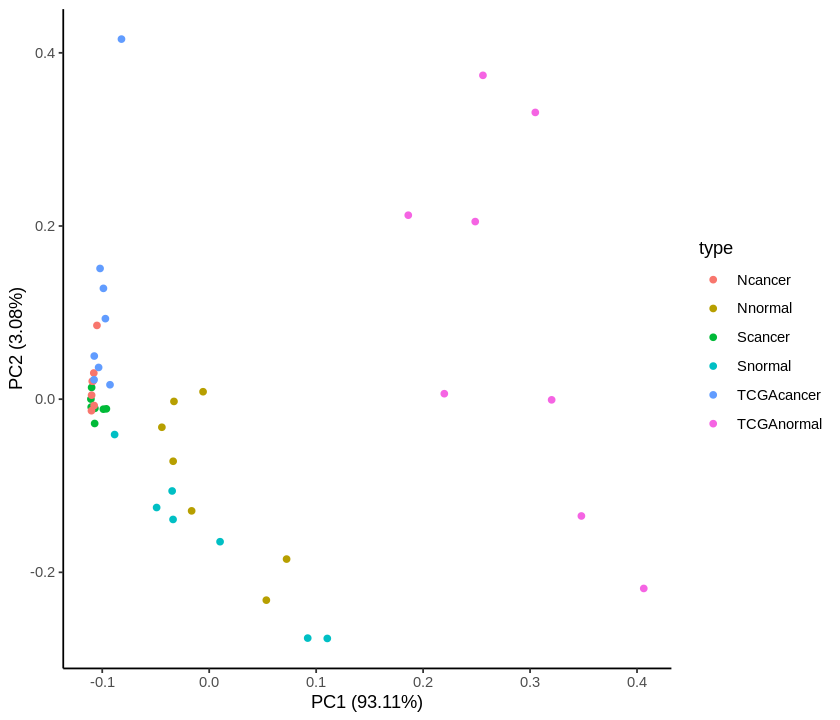

In [31]:
library(ggplot2)
library(ggfortify)
library(devtools)
# 先转置一下，让行为样本
# prcomp()主成分分析
# 先在原来数据的基础上添加样本分组信息(别忘了a3是一个矩阵，先转换成数据框
know2<-as.data.frame(t(normalized_counts))
know2$type<-typesp
autoplot(prcomp(know2[,1:17066]), data=know2,label=F,label.size=20,colour="type")+theme_classic()

In [32]:
ann_colors = list(
  Type=c(Ncancer="tomato",TCGAcancer="dodgerblue",Scancer='forestgreen'))

In [33]:
sources<-c('Scancer','Ncancer','Ncancer',rep("Scancer",times=6),rep("Ncancer",times=5),rep("TCGAcancer",times=8))

annotation_col = data.frame(
 Type = factor(know2$type))

rownames(annotation_col) = rownames(know2)



In [34]:
colnames(norcan)

[1] "Ca1"              "Ca2534465"        "Ca2537821"        "Ca3"             
 [5] "Ca4"              "Ca5"              "Ca6"              "Ca7"             
 [9] "Ca2"              "Ca2393116"        "Ca2518780"        "Ca2520263"       
[13] "Ca2523247"        "Ca2287602"        "TCGA.W5.AA2I.01A" "TCGA.W5.AA2Q.01A"
[17] "TCGA.W5.AA2R.01A" "TCGA.W5.AA2U.01A" "TCGA.W5.AA30.01A" "TCGA.W5.AA31.01A"
[21] "TCGA.W5.AA34.01A" "TCGA.ZU.A8S4.01A"

In [35]:
M=cor(norcan)

In [36]:
options(repr.plot.height=6,repr.plot.width=7)

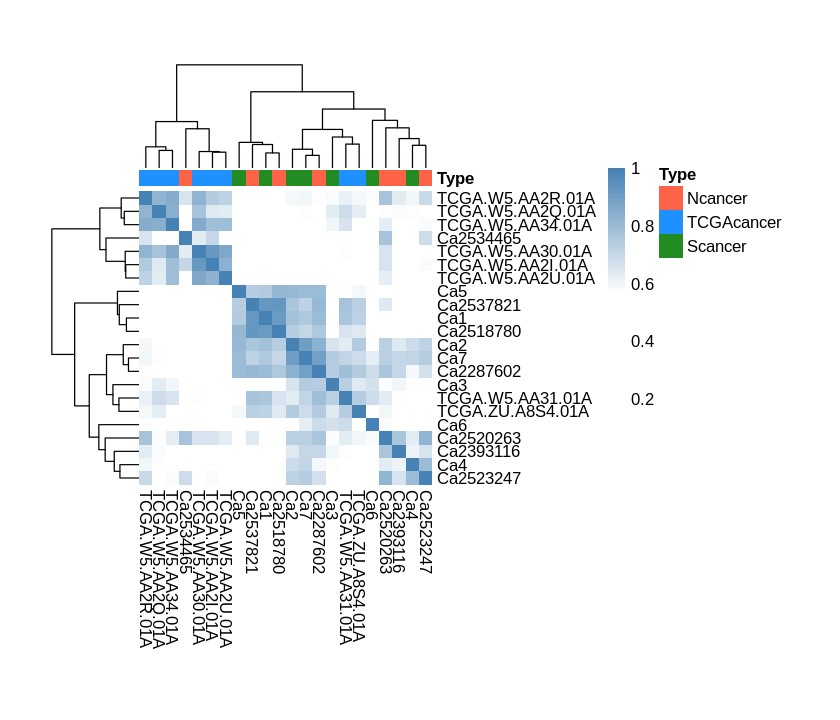

In [37]:
library(pheatmap)
library(ggplot2)
p<-pheatmap(M,display_numbers = FALSE,fontsize_number=3,cluster_col=T,treeheight_col=60,cluster_row=T,color = colorRampPalette(c("white",'white',"steelblue"))(100),border=F,cellwidth=8,cellheight=8,annotation_col=annotation_col,annotation_colors=ann_colors)

In [38]:
save_pheatmap_pdf <- function(x, filename, width=10, height=10) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   pdf(filename, width=width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}

In [39]:
save_pheatmap_pdf(p, "0725-test.pdf")

png 
  2

In [40]:
expr_df2<-expr_df[,1:28]
type2<-type[1:28]

In [41]:
require("edgeR")
require("limma")
expr_df2_e<-expr_df2[apply(cpm(expr_df2),1,sum)>5,]

In [42]:
# 这一步很关键，要明白condition这里是因子，不是样本名称；小鼠数据有对照组和处理组，各两个重复

condition <- factor(type2, levels = c("normal","cancer"))
condition
#colData也可以自己在excel做好另存为.csv格式，再导入即可
colData <- data.frame(row.names=colnames(expr_df2_e), condition)
colData

##############################3

dds2 <- DESeqDataSetFromMatrix(expr_df2_e, colData, design=~condition)
dds2 <- DESeq(dds2)

res= results(dds2)
res = res[order(res$pvalue),]
head(res)
row.names(res)
summary(res)
#所有结果先进行输出
write.csv(res,file="0708_DESEQ_results_noref.csv")
table(res$padj<0.05)


[1] cancer normal cancer normal cancer normal cancer normal normal normal
[11] normal normal cancer cancer cancer cancer cancer normal normal normal
[21] normal normal normal cancer cancer cancer cancer cancer
Levels: normal cancer

,condition
,<fct>
Ca1,cancer
N1,normal
Ca2534465,cancer
N2534465,normal
Ca2537821,cancer
N2537821,normal
Ca3,cancer
N3,normal
N6,normal


converting counts to integer mode

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 820 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



log2 fold change (MLE): condition cancer vs normal 
Wald test p-value: condition cancer vs normal 
DataFrame with 6 rows and 6 columns
        baseMean log2FoldChange     lfcSE      stat      pvalue        padj
       <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
CYP2A6 11694.219       -7.33573  0.515961  -14.2176 7.12537e-46 1.19742e-41
AHNAK2  4331.258        5.75196  0.407479   14.1160 3.02765e-45 2.54399e-41
CYP2A7  1157.783       -6.92132  0.496064  -13.9525 3.03861e-44 1.70213e-40
GNMT    1343.041       -6.50160  0.471614  -13.7859 3.10078e-43 1.30272e-39
PCK2    4959.645       -3.91136  0.296959  -13.1714 1.28217e-39 4.30936e-36
NR1I3    703.425       -4.35045  0.331945  -13.1059 3.04556e-39 8.53011e-36

[1] "CYP2A6"          "AHNAK2"          "CYP2A7"          "GNMT"           
    [5] "PCK2"            "NR1I3"           "APOM"            "MUT"            
    [9] "GLS2"            "CBS"             "GLYCTK"          "ETFDH"          
   [13] "COL11A1"         "HEPACAM"         "SHBG"            "ACAA2"          
   [17] "CAT"             "MPC1"            "DHTKD1"          "ALDH6A1"        
   [21] "HAAO"            "CYP2B6"          "PKM"             "ACOX2"          
   [25] "CRYL1"           "GPLD1"           "ECHS1"           "PHYH"           
   [29] "ACADM"           "SARDH"           "PEMT"            "PEBP1"          
   [33] "CYP4A22"         "ETNK2"           "GCDH"            "MLXIPL"         
   [37] "ENTPD5"          "NADK2"           "SRD5A2"          "RIDA"           
   [41] "SLC10A1"         "ITGB4"           "GRHPR"           "ITGA3"          
   [45] "MUC1"            "POR"             "MTHFD1"          "HSDL2"          
   [49] "MBNL3"           "CYP39A1"         "DUSP4"           "DCXR"           
   [53] "EHHADH"          "GOT2"            "ASPDH"           "CYP3A7"         
   [57] "CYP2D6"          "PGRMC1"          "MGMT"            "ITPR3"          
   [61] "PCCB"            "ACAA1"           "ANG"             "ABHD6"          
   [65] "ETFRF1"          "HSD17B13"        "TFAP2A"          "FAH"            
   [69] "TTR"             "BCHE"            "SCP2"            "BCKDHB"         
   [73] "CD302"           "HMGCL"           "SLC6A1"          "TM6SF2"         
   [77] "ADAM9"           "CLPX"            "GSTA1"           "PIPOX"          
   [81] "SGPP2"           "NPTX1"           "HSD11B1"         "SULF1"          
   [85] "PXMP2"           "AMDHD1"          "C1RL"            "SLC6A13"        
   [89] "SHMT1"           "TTC36"           "ACADSB"          "SLC25A13"       
   [93] "HSD17B6"         "IGF2BP3"         "DHRS1"           "MST1"           
   [97] "LRCOL1"          "ECI2"            "SPECC1"          "MYO1B"          
  [101] "SLC6A8"          "AIG1"            "AADAT"           "CYB5A"          
  [105] "PPARA"           "LEPR"            "ECT2"            "SPOCD1"         
  [109] "ALDH5A1"         "LDHD"            "C16orf70"        "HDAC6"          
  [113] "ADI1"            "UGT2B7"          "GALNT5"          "PMEPA1"         
  [117] "TMEM56"          "SLC27A5"         "ANGPTL3"         "ZNF532"         
  [121] "SELENOP"         "SFN"             "GCNT3"           "GPR88"          
  [125] "AGR2"            "FAHD2A"          "IGFALS"          "CYP2C8"         
  [129] "LCAT"            "CDH3"            "ENO3"            "GLUD1"          
  [133] "FXN"             "GALNT12"         "ALAD"            "SOD1"           
  [137] "KHK"             "EPHX2"           "DKK1"            "PGLYRP2"        
  [141] "PLCD3"           "GPT2"            "PLGLB1"          "ARSF"           
  [145] "TRIP13"          "F12"             "ALAS1"           "BHMT"           
  [149] "SERPIND1"        "HAL"             "PCSK6"           "LAMC2"          
  [153] "PANK1"           "CA12"            "IQGAP3"          "DIO1"           
  [157] "NECTIN4"         "ANLN"            "TTC38"           "ANGPTL6"        
  [161] "C11orf54"        "SLC25A15"        "SLC22A1"         "HGFAC"          
  [165] "ADAM12"          "PFKP"            "CYP4A11"         "PLIN5"          
  [169] "KIF23"           "RBP5"            "AGMAT"           "AZGP1"          
  [173] "BTD"             "SAR1B"           "ZG16"            "AK3"            
  [177] "ISOC1"           "PLIN1"           "STRIP2"          "RABEP1"         
  [181] "PKP3"            "TUBB3"           "FH"              "PEG3"           
  [185] "GLYAT"           "RUNDC3B"         "ACADVL"          "SLC7A11"        
  [189] "WNK3"            "LIPC"            "CLEC1B"          "APMAP"          
  [193] "ABCA12"          "TMEM57"          "SLC16A2"         "B3GNT5"         
  [197] "ITGB6"           "SORD"            "PRDX3"           "ARID3C"         
  [2


out of 16805 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 5839, 35%
LFC < 0 (down)     : 3692, 22%
outliers [1]       : 0, 0%
low counts [2]     : 2, 0.012%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results




FALSE  TRUE 
 8358  8447 

In [43]:
res=results(dds2)

In [44]:
normalized_counts <- counts(dds2, normalized=TRUE)
save(normalized_counts,file="0725_normalizedcounts_noref.Rda")

In [45]:
# 差异基因筛选，padj<0.05
res_de <- subset(res, res$padj<0.05,select=c('log2FoldChange', 'padj'))
# foldchange > 1
res_de_up <- subset(res_de, res_de$log2FoldChange>=5)

res_de_dw <- subset(res_de, res_de$log2FoldChange<=(-5)*1)

row_de_up<-row.names(res_de_up)
row_de_dw<-row.names(res_de_dw)


In [46]:
write.csv(res_de_up,file="topupDEG_0725.csv")

In [47]:
write.csv(res_de_dw,file="topdwDEG_0725.csv")